# Investigating Environmental Hotspots of Swedish Household Consumption

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Impressum

This Jupyter notebook is the python-code for the Degree Project written by Tobias Steinegger to obtain his Degree in MSc. Sustainable Technology (*Industrial Ecology*). The project aims at estimating the environmental impacts of Swedish households by combining environmnetally extended multi-regional input-output tables (*EEMRIOT*), namely *EXIOBASE 3.4* and link them to existing Household Expenditure Surveys (*HBS*). Further description of the research methodology can be found in the thesis, linked underneath.

**This approach lead to the research question of the degree project:**

>*How expenditures and environmental impacts are distributed among different goods and services for different household groups and regions in Sweden?*


This research question is divided into two research objectives RO:  
>**RO 1.** Estimate the consumption-based environmental impact of Sweden with the most recent available data;  
>**RO 2.** Develop a methodological framework linking Swedish household expenditure surveys to environmentally extended multiregional input-output tables to investigate the environmental footprint and hotspots of a Swedish Household; 

The aim of this project was therefore three-fold: (i) calculating the current consumption-based emissions of Sweden; (ii) developing a methodology to connect Swedish household consumption with environmentally-extended input-output tables; (iii) estimating the environmental impacts and hotspots of Swedish households.

***
**Author:** Tobias Steinegger  
**Degree project:** AL250X Degree Project in Strategies for Sustainable Development  
**Program:** MSc. Sustainable Technology  
**Institution:** Royal Institute of Technology, KTH  
**Place:** Stockholm  
**Contact:** tobias.steinegger@bluewin.ch
**Thesis available online:** https://kth.diva-portal.org/smash/get/diva2:1348995/FULLTEXT01.pdf 
**Date of submission:** eptember 2019
***
***Remark:*** This is a student project and mark my first steps of programming in Python, therefore the author takes no liability over the data, the calculations or the emerging results!
***

# RO 0.0 Prepartion of the Python Packages and the Database

First, all the necessary packages for this projects are imported:

In [1]:
import pymrio
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import country_converter as coco
import sys as os

In [2]:
print(" Pandas version: " + pd.__version__)
print(" Numpy version: " + np.__version__)
print(" Seaborn version: " + sb.__version__)
#print(" Matplotlib version: " + plt.__version__)
print(" Country converter version: " + coco.__version__)

 Pandas version: 0.24.2
 Numpy version: 1.16.2
 Seaborn version: 0.9.0
 Country converter version: 0.6.6


Needed for creating the table of content on top:

In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

The report is based on the environmental data provided in the *EXIOBASE 3.4 - IOT - 2011 - pxp* which is freely available on: https://exiobase.eu/index.php/data-download/exiobase3mon  
For further information on the construction and underlying principle of the EXIOBASE 3, please see:  
*Wood, R., Stadler, K., Bulavskaya, T., Lutter, S., Giljum, S., de Koning, A., Kuenen, J., Schütz, H., Acosta-Fernández, J. and Usubiaga, A., 2015. Global sustainability accounting—developing EXIOBASE for multi-regional footprint analysis. Sustainability, 7(1), pp.138–163.*

In a second step, the database Exiobase 3.4 is parsed and imported into the system as ```exio3```


In [4]:
exio3 = pymrio.parse_exiobase3(path='C:/Users/tobia/Desktop/Database_LCA/exiobase3.4_iot_2011_pxp/IOT_2011_pxp')

C:\Users\tobia\Anaconda3\envs\Pymrio\lib\site-packages\pymrio\core\fileio.py:288: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  header=_header))


In order to calculate all missing tables, using the ```calc_all()``` command.

In [5]:
exio3.calc_all()

Plot the EXIO3 accounts for the environmental stressor *'CO2-combustion-air'* in a seperate window

In [6]:
%matplotlib qt
exio3.satellite.plot_account('CO2 - combustion - air')
plt.show()

In [7]:
#Total expenditure for Swedish households:
exio3.Y.SE.sum()

category
Final consumption expenditure by households                                             169980.201735
Final consumption expenditure by non-profit organisations serving households (NPISH)     15138.724265
Final consumption expenditure by government                                             101708.227592
Gross fixed capital formation                                                            94131.942491
Changes in inventories                                                                    4543.420457
Changes in valuables                                                                         0.000000
Exports: Total (fob)                                                                         0.000000
dtype: float64

This report is mainly interested in the consumption based accounts *'exio3.satellite.D_cba'*. Consumption-based accounts are defined as the environmental impacts that occur due to consumption, means: *Consumption = Production + Import -Export*

In [8]:
exio3.satellite.D_cba
exio3.satellite.D_cba_reg

region,AT,BE,BG,CY,CZ,DE,DK,EE,ES,FI,...,TR,TW,NO,ID,ZA,WA,WL,WE,WF,WM
Taxes less subsidies on products purchased: Total,1.362251e+04,1.985186e+04,2.218660e+03,6.295381e+02,8.103264e+03,1.180021e+05,1.259920e+04,1.053775e+03,4.260830e+04,1.030063e+04,...,5.036719e+04,1.165991e+04,1.541281e+04,3.282434e+04,2.067937e+04,2.238648e+05,2.287465e+05,3.114963e+04,1.586049e+05,2.513780e+05
Other net taxes on production,6.103556e+03,6.026566e+03,5.462890e+02,7.150655e+02,1.070456e+03,1.984904e+04,2.971154e+03,1.632947e+02,1.424046e+04,9.021262e+02,...,8.478190e+03,1.002672e+04,1.790371e+03,1.673609e+04,6.952306e+03,6.121378e+04,6.899727e+04,9.978492e+03,4.371538e+04,6.946837e+04
"Compensation of employees; wages, salaries, & employers social contributions: Low-skilled",1.061780e+04,1.397937e+04,1.339204e+03,7.977238e+02,3.779616e+03,6.673981e+04,1.212026e+04,5.448535e+02,4.810833e+04,7.636838e+03,...,2.049963e+04,1.694190e+04,1.312564e+04,2.470071e+04,1.246853e+04,1.079187e+05,5.755465e+04,1.672947e+04,8.415286e+04,7.952591e+04
"Compensation of employees; wages, salaries, & employers social contributions: Medium-skilled",6.942497e+04,8.238805e+04,8.730109e+03,4.126077e+03,2.988124e+04,5.641227e+05,5.906922e+04,3.304123e+03,2.484917e+05,4.449555e+04,...,1.227783e+05,1.022466e+05,7.620551e+04,1.346768e+05,4.888275e+04,6.677931e+05,4.852468e+05,8.662124e+04,2.352330e+05,4.444607e+05
"Compensation of employees; wages, salaries, & employers social contributions: High-skilled",7.836160e+04,1.025254e+05,8.016956e+03,4.473269e+03,3.794607e+04,7.210208e+05,6.901867e+04,3.987665e+03,2.522517e+05,5.560204e+04,...,9.904794e+04,4.975263e+04,8.208182e+04,5.049470e+04,6.873167e+04,3.325094e+05,3.131235e+05,6.926108e+04,2.262130e+05,3.825625e+05
Operating surplus: Consumption of fixed capital,5.258742e+04,6.457209e+04,6.439380e+03,2.647052e+03,3.044064e+04,4.223236e+05,4.304456e+04,2.735572e+03,1.725750e+05,3.527640e+04,...,7.850444e+04,4.942616e+04,4.616871e+04,7.065823e+04,7.357428e+04,2.283011e+05,2.062088e+05,3.515773e+04,1.286965e+05,2.127556e+05
Operating surplus: Rents on land,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Operating surplus: Royalties on resources,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Operating surplus: Remaining net operating surplus,6.973212e+04,8.729508e+04,1.323182e+04,6.739052e+03,4.562954e+04,6.554699e+05,3.289242e+04,3.902313e+03,2.933309e+05,4.406422e+04,...,2.251767e+05,8.536556e+04,7.712858e+04,2.955254e+05,6.537635e+04,3.891866e+05,3.279145e+05,5.834717e+04,2.189974e+05,3.521483e+05
Employment: Low-skilled male,7.627747e+02,1.609371e+03,2.886025e+02,6.911622e+01,5.218465e+02,6.161907e+03,5.752234e+02,1.008421e+02,3.756031e+03,4.132710e+02,...,3.504514e+03,1.586150e+03,6.101026e+02,1.213243e+04,2.273744e+03,4.249360e+04,1.203375e+04,1.220815e+04,8.235181e+04,9.944481e+03


The foundation of the calculation is now created and ready for further calculations in RO 1.0.

**There are certain important commands that help navigating through the panda frames:** 
  
* prints the shape of the data frame, in forms of rows x columns (120x1104): ```df.shape()```
* returns a list of all the indices of the dataframe (index = rows): ```df.index()```
* returns a list of all the columns of the dataframe (columns = columns): ```df.columns()```
* command for display all rows and columns, with no 'gap' in between:<br>```with pd.option_context('display.max_rows', None, 'display.max_columns', None):```<br>
```display(df)```
* To call only one specific index with a label: ```df.loc['label']```
* To call a specific position in the index, only taking integers: ```df.iloc[0,:]```
* Call one specific row: ```df.xs('Ris', level=3)```
* To show output in a seperate window: ```%matplotlib qt```
* To show output inline: ```%matplotlib inline```

# RO 1.0 Estimate the consumption-based environmental impacts of Sweden with the most recent data available

## RO 1.1 Aggregation
This report aggregates the different countries and region into three main categories. Due to the focus on the report the categories are: *'SE', 'EU' and 'RoW'*

>**SE(1):** Sweden <br>
**EU(26):** Austria, Italy, Belgium, Latvia, Bulgaria, Lithuania, Croatia, Luxembourg, Cyprus, Malta, Czechia, Netherlands, Denmark, Poland, Estonia, Portugal, Finland, Romania, France, Slovakia, Germany, Slovenia, Greece, Spain, Hungary, Ireland, United Kingdom <br>
**RoW(21):** Rest of Countries

In [9]:
# A list with all the regions from exio3 is created and then the ones chosen according to their placement in the list.
regions = list(exio3.get_regions())
EU = regions[0:24]+ regions[25:28]
SE = regions[24]
RoW = regions[28:]

regions

['AT',
 'BE',
 'BG',
 'CY',
 'CZ',
 'DE',
 'DK',
 'EE',
 'ES',
 'FI',
 'FR',
 'GR',
 'HR',
 'HU',
 'IE',
 'IT',
 'LT',
 'LU',
 'LV',
 'MT',
 'NL',
 'PL',
 'PT',
 'RO',
 'SE',
 'SI',
 'SK',
 'GB',
 'US',
 'JP',
 'CN',
 'CA',
 'KR',
 'BR',
 'IN',
 'MX',
 'RU',
 'AU',
 'CH',
 'TR',
 'TW',
 'NO',
 'ID',
 'ZA',
 'WA',
 'WL',
 'WE',
 'WF',
 'WM']

Region aggreg matrix: <br>3 regions, row_SE = SE(24), row_EU = EU excl. SE, row_NONEU = Row, therefore we create the countrymatrix cm

In [10]:
# The variable cm is constructed by filling the three different np.arrays with a 1 in the place where the country belongs.
# Example: the row_SE is a np.array with all 0 and a length of the variable regions. Sweden is the 24th country in the list,
# therefore on place 24 a 1 instead of 0 is paced. The same with the other two rows. Finally, all the three rows are concatenated.
row_SE = np.zeros((1,len(regions)))
row_EU = np.zeros((1,len(regions)))
row_RoW = np.zeros((1,len(regions)))
cm = np.concatenate((row_SE,row_EU,row_RoW))
cm[0,24] = 1
cm[1,0:24] = 1
cm[1,25:28] = 1
cm[2,28:] = 1

cm

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.]])

In a next step we need to create the sector aggregation matrix: no aggregation is needed, therefore identity matrix of dimension 200x200 according to all products.

In [11]:
# Defining the production matrix
pro = list(exio3.get_sectors())
pm = np.identity(len(pro))

pm

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Now we have the two different aggregation matrices (country matrix and product matrix) which can now be multiplied.

In [12]:
# Elias made that, therefore we do to.
# This is not making a copy! Just same pointer!
SE_aggr = exio3.copy('SE_aggr') 
SE_aggr

Important note from Elia:
Aggregate method bug: run calc_all first, and convert to dataframe the x vector, before running aggregation
https://github.com/konstantinstadler/pymrio/issues/21 

In [13]:
SE_aggr.x = pd.DataFrame(SE_aggr.x)

#The actual multiplication / aggregation
SE_aggr.aggregate(region_agg=cm, region_names=['SE','EU','RoW'], sector_agg=pm, sector_names=pro)

In [14]:
SE_aggr.get_sectors()
SE_aggr.get_regions()

Index(['SE', 'EU', 'RoW'], dtype='object', name='region')

Recalculate all the matrices belonging to the system.

In [15]:
SE_aggr.calc_all()

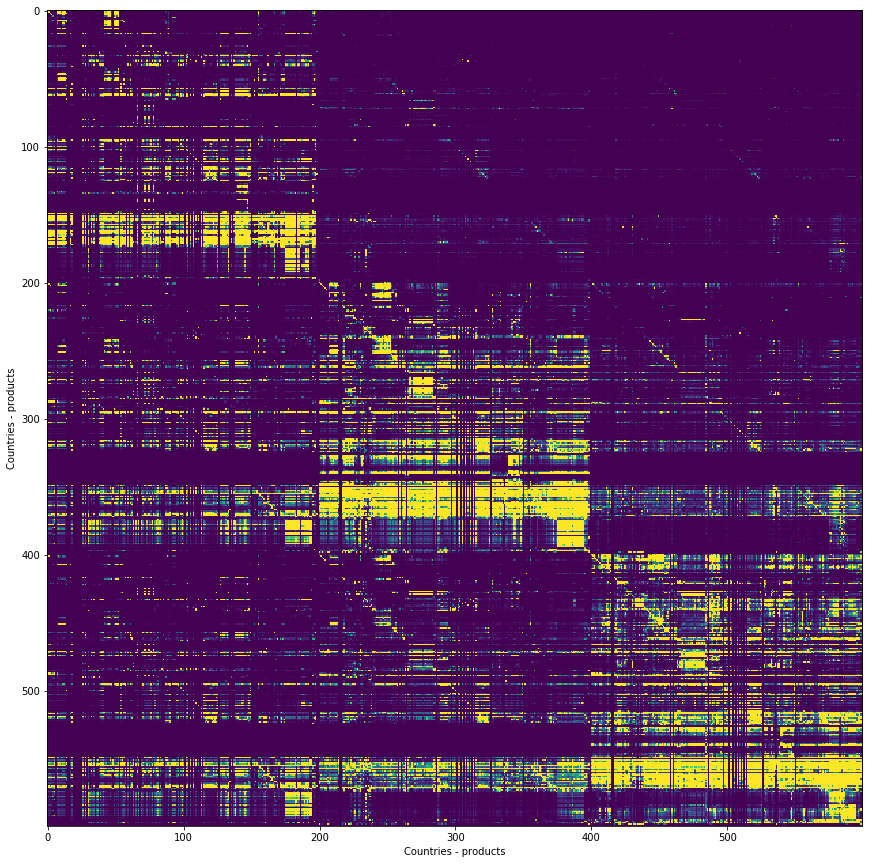

In [16]:
# This plot gives a overview of the interaction between the different products of different regions.
# It shows that the calculation are conducted correctly.
%matplotlib inline
plt.figure(figsize=(15,15))
plt.imshow(SE_aggr.A, vmax=1E-3)
plt.xlabel('Countries - products')
plt.ylabel('Countries - products')
plt.show()

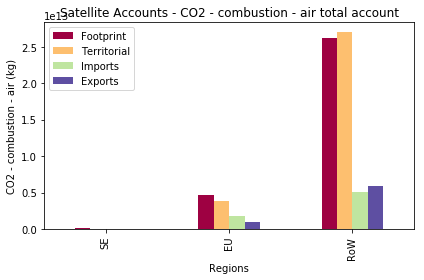

In [17]:
# This plot shows one of the 1104 stressors ('CO2 - combustion - air') and how they are composed for different regions.
# Footprint is the consumption based account. Means: Footprint = Territorial + Imports - Exports
SE_aggr.satellite.plot_account('CO2 - combustion - air', per_capita=False, file_name=False, file_dpi=600, population=None)
plt.show()

In [18]:
# This are different commands to show the dataframe, comprised in the aggregated database: SE_aggr.
# The meaning of the different varibles can be seen in the report or the Pymrio manual.
SE_aggr.Y.SE
SE_aggr.satellite.M
SE_aggr.satellite.D_imp.SE

sector,Paddy rice,Wheat,Cereal grains nec,"Vegetables, fruit, nuts",Oil seeds,"Sugar cane, sugar beet",Plant-based fibers,Crops nec,Cattle,Pigs,...,Paper for treatment: landfill,Plastic waste for treatment: landfill,Inert/metal/hazardous waste for treatment: landfill,Textiles waste for treatment: landfill,Wood waste for treatment: landfill,Membership organisation services n.e.c. (91),"Recreational, cultural and sporting services (92)",Other services (93),Private households with employed persons (95),Extra-territorial organizations and bodies
Taxes less subsidies on products purchased: Total,1.995815e-03,6.195243e+00,7.060391e-01,7.386633e+01,7.774982e+00,1.569654e-03,2.902851e-05,1.568651e+01,1.945545e-01,6.861986e-01,...,0.0,0.0,0.0,0.0,0.0,1.494666e+02,9.794902e+01,2.060625e+01,1.069452e-01,0.0
Other net taxes on production,7.564636e-03,1.147986e-01,1.456833e-02,5.854344e+00,-5.538774e+00,5.415737e-04,5.191635e-06,4.943935e+00,5.799399e-02,2.228731e-01,...,0.0,0.0,0.0,0.0,0.0,5.301741e+01,4.110628e+01,7.235202e+00,3.050233e-02,0.0
"Compensation of employees; wages, salaries, & employers social contributions: Low-skilled",1.933978e-03,2.678154e+00,3.174429e-01,5.158708e+01,4.576988e+00,9.871885e-04,1.976357e-05,1.099460e+01,1.083481e-01,3.453445e-01,...,0.0,0.0,0.0,0.0,0.0,8.964461e+01,6.125648e+01,1.191397e+01,7.310671e-02,0.0
"Compensation of employees; wages, salaries, & employers social contributions: Medium-skilled",1.839900e-02,1.916290e+01,2.070926e+00,2.612128e+02,2.966931e+01,6.275376e-03,1.134300e-04,5.945653e+01,6.924271e-01,2.361186e+00,...,0.0,0.0,0.0,0.0,0.0,5.527111e+02,3.630407e+02,7.832720e+01,3.970437e-01,0.0
"Compensation of employees; wages, salaries, & employers social contributions: High-skilled",1.159709e-02,1.323501e+01,1.716176e+00,1.221060e+02,1.381682e+01,5.158509e-03,2.527940e-05,1.456970e+01,4.600488e-01,1.756361e+00,...,0.0,0.0,0.0,0.0,0.0,4.789227e+02,3.056607e+02,6.303171e+01,3.850063e-01,0.0
Operating surplus: Consumption of fixed capital,2.745377e-02,1.544153e+01,1.962293e+00,2.399582e+02,2.338704e+01,4.247795e-03,7.134037e-05,2.629629e+01,4.389482e-01,1.545611e+00,...,0.0,0.0,0.0,0.0,0.0,3.198759e+02,2.259628e+02,4.612496e+01,2.042064e-01,0.0
Operating surplus: Rents on land,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
Operating surplus: Royalties on resources,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
Operating surplus: Remaining net operating surplus,7.345348e-02,2.749943e+01,3.331118e+00,4.108412e+02,2.747949e+01,7.700056e-03,3.281405e-04,6.021834e+01,7.832816e-01,2.644914e+00,...,0.0,0.0,0.0,0.0,0.0,5.266578e+02,3.695278e+02,7.928833e+01,2.831627e-01,0.0
Employment: Low-skilled male,6.490581e-04,7.816798e-01,4.506090e-02,3.719312e+01,8.847696e-01,1.941835e-04,1.239370e-05,1.365118e+01,5.244610e-02,9.629277e-02,...,0.0,0.0,0.0,0.0,0.0,1.841502e+01,1.473139e+01,2.464839e+00,1.422734e-02,0.0


As a final step, the whole database ``SE_aggr`` was saved to a folder on the desktop.

In [20]:
save_folder_full = 'C:/Users/tobia/Desktop/Database_LCA/SE_aggr'
SE_aggr.save_all('C:/Users/tobia/Desktop/Database_LCA/SE_aggr')

## RO 1.2 Characterisation
Now we are importing the correspondence file for the characterisation of the environmental stressors into the four footprint (Carbon, Land, Material, Blue Water) according to Steinmann et al. (2018)

In [43]:
characterisation = pd.read_csv('C:/Users/tobia/Dropbox/KTH Sustainable Technology/4_AL250X_Degree Project in Strategies for Sustainable Development/9. Sharing Sjoerd/CF_exio.csv',';', header=[0], index_col = [0])
characterisation

,Taxes less subsidies on products purchased: Total,Other net taxes on production,"Compensation of employees; wages, salaries, & employers social contributions: Low-skilled","Compensation of employees; wages, salaries, & employers social contributions: Medium-skilled","Compensation of employees; wages, salaries, & employers social contributions: High-skilled",Operating surplus: Consumption of fixed capital,Operating surplus: Rents on land,Operating surplus: Royalties on resources,Operating surplus: Remaining net operating surplus,Employment: Low-skilled male,...,Water Withdrawal Blue - Electricity - once-through - Electricity by hydro,Water Withdrawal Blue - Electricity - once-through - Electricity by wind,Water Withdrawal Blue - Electricity - once-through - Electricity by petroleum and other oil derivatives,Water Withdrawal Blue - Electricity - once-through - Electricity by biomass and waste,Water Withdrawal Blue - Electricity - once-through - Electricity by solar photovoltaic,Water Withdrawal Blue - Electricity - once-through - Electricity by solar thermal,"Water Withdrawal Blue - Electricity - once-through - Electricity by tide, wave, ocean",Water Withdrawal Blue - Electricity - once-through - Electricity by Geothermal,Water Withdrawal Blue - Electricity - once-through - Electricity nec,Water Withdrawal Blue - Domestic - domestic Water Withdrawal Blue
Carbon Footprint [t CO2-eq.],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Land footprint [km2],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Material footprint [kt],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Water footprint [Mm3],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After creating the characterisation matrix, we need to multiply the consumption based account ``D_cba`` with the characterisation matrix ``characterisation``.

In [44]:
stressor_aggr_indicator = SE_aggr.satellite.D_cba.T.dot(characterisation.T)
stressor_aggr_indicator

Carbon Footprint [t CO2-eq.]  \
region sector                                                                             
SE     Paddy rice                                                          4.300361e+02   
       Wheat                                                               2.708281e+05   
       Cereal grains nec                                                   3.951627e+04   
       Vegetables, fruit, nuts                                             7.062354e+05   
       Oil seeds                                                           1.847766e+05   
       Sugar cane, sugar beet                                              8.788258e+01   
       Plant-based fibers                                                  4.240767e-01   
       Crops nec                                                           3.812132e+05   
       Cattle                                                              1.352361e+05   
       Pigs                                                                3.745667e+04   
       Poultry                                                             1.681942e+05   
       Meat animals nec                                                    3.446644e+05   
       Animal products nec                                                 3.198690e+05   
       Raw milk                                                            6.566744e+03   
       Wool, silk-worm cocoons                                             1.707951e+00   
       Manure (conventional treatment)                                     0.000000e+00   
       Manure (biogas treatment)                                           0.000000e+00   
       Products of forestry, logging and related servi...                  1.768469e+05   
       Fish and other fishing products; services incid...                  8.836144e+04   
       Anthracite                                                          6.103460e+00   
       Coking Coal                                                         7.129399e+03   
       Other Bituminous Coal                                               7.552722e+04   
       Sub-Bituminous Coal                                                 1.891207e+01   
       Patent Fuel                                                         4.032836e-04   
       Lignite/Brown Coal                                                  2.357234e-01   
       BKB/Peat Briquettes                                                 9.876062e-04   
       Peat                                                                4.506679e+02   
       Crude petroleum and services related to crude o...                  0.000000e+00   
       Natural gas and services related to natural gas...                  1.221635e+05   
       Natural Gas Liquids                                                 0.000000e+00   
...                                                                                 ...   
RoW    Research and development services (73)                              2.915531e+08   
       Other business services (74)                                        1.383797e+08   
       Public administration and defence services; com...                  2.417794e+09   
       Education services (80)                                             6.501118e+08   
       Health and social work services (85)                                1.401999e+09   
       Food waste for treatment: incineration                              7.628030e+06   
       Paper waste for treatment: incineration                             7.827239e+06   
       Plastic waste for treatment: incineration                           1.302653e+07   
       Intert/metal waste for treatment: incineration                      1.198959e+07   
       Textiles waste for treatment: incineration                          1.147540e+07   
       Wood waste for treatment: incineration                              2.619927e+06   
       Oil/hazardous waste for treatment: incineration 

In [45]:
# Slicing only the environmental footprints for all products in Sweden
stressor_aggr_indicator.xs('SE')

,Carbon Footprint [t CO2-eq.],Land footprint [km2],Material footprint [kt],Water footprint [Mm3]
sector,,,,
Paddy rice,4.300361e+02,4.059979e-01,2.334721e-01,1.015887e-01
Wheat,2.708281e+05,4.528841e+03,1.234295e+03,5.769528e+01
Cereal grains nec,3.951627e+04,7.696287e+02,1.719641e+02,4.018649e-01
"Vegetables, fruit, nuts",7.062354e+05,3.492989e+03,4.115869e+03,2.586223e+02
Oil seeds,1.847766e+05,3.182918e+03,5.764728e+02,1.434237e+01
"Sugar cane, sugar beet",8.788258e+01,1.347821e+00,3.899792e+00,1.076404e-02
Plant-based fibers,4.240767e-01,2.246884e-03,6.882919e-04,5.000705e-06
Crops nec,3.812132e+05,1.616982e+03,4.346631e+02,1.235689e+02
Cattle,1.352361e+05,1.556224e+03,6.266705e+02,3.939932e+00


In [46]:
# Grouping the environmental footprints as a total per region
World_Overview = stressor_aggr_indicator.groupby(level=0).sum()
World_Overview


,Carbon Footprint [t CO2-eq.],Land footprint [km2],Material footprint [kt],Water footprint [Mm3]
region,,,,
EU,5.069025e+09,6.393946e+06,1.012672e+07,1.096098e+05
RoW,3.238914e+10,5.797612e+07,6.806164e+07,1.048253e+06
SE,9.426935e+07,3.330935e+05,2.791771e+05,1.998759e+03


## RO 1.3 Visualisation of Swedish Consumption-based Emissions

The results of RO 1.0 shall be visualised in different ways. The first try is a nested treemap of all the regions, showing the total of all the four environmental footprints in four subplots.

In [47]:
# Preperation of the data needed. All data saved in the according variable.

index = [SE]

# Extracting the data out of the satellite accounts from Exiobase
D_imp = SE_aggr.satellite.D_imp.SE
D_exp = SE_aggr.satellite.D_exp.SE
D_cba = SE_aggr.satellite.D_cba.SE
D_pba = SE_aggr.satellite.D_pba.SE

# Multiply the data with characterisation file, transposing is needed. Result are the exiobase accounts in the four environmental footprint (Carbon, Land, Material, Water)
D_imp_chr = D_imp.T.dot(characterisation.T)
D_exp_chr = D_exp.T.dot(characterisation.T)
D_cba_chr = D_cba.T.dot(characterisation.T)
D_pba_chr = D_pba.T.dot(characterisation.T)

# Extracting the correct row from each of the variables to receive the value needed. 

# For the Carbon footprint
Footprint_gwp = D_cba_chr.iloc[:,0].sum()
Territorial_gwp = D_pba_chr.iloc[:,0].sum()
Imports_gwp = D_imp_chr.iloc[:,0].sum()
Exports_gwp = D_exp_chr.iloc[:,0].sum() 
df_carbon = pd.DataFrame({'Footprint': Footprint_gwp, 'Territorial': Territorial_gwp, 'Imports': Imports_gwp, 'Exports': Exports_gwp}, index = index)

# For the Land footprint
Footprint_land = D_cba_chr.iloc[:,1].sum()
Territorial_land = D_pba_chr.iloc[:,1].sum()
Imports_land = D_imp_chr.iloc[:,1].sum()
Exports_land = D_exp_chr.iloc[:,1].sum() 
df_land = pd.DataFrame({'Footprint': Footprint_land, 'Territorial': Territorial_land, 'Imports': Imports_land, 'Exports': Exports_land}, index = index)

# For the Material footprint
Footprint_material = D_cba_chr.iloc[:,2].sum()
Territorial_material = D_pba_chr.iloc[:,2].sum()
Imports_material = D_imp_chr.iloc[:,2].sum()
Exports_material = D_exp_chr.iloc[:,2].sum() 
df_material = pd.DataFrame({'Footprint': Footprint_material, 'Territorial': Territorial_material, 'Imports': Imports_material, 'Exports': Exports_material}, index = index)

# For the Water footprint
Footprint_water = D_cba_chr.iloc[:,3].sum()
Territorial_water = D_pba_chr.iloc[:,3].sum()
Imports_water = D_imp_chr.iloc[:,3].sum()
Exports_water = D_exp_chr.iloc[:,3].sum()
df_water = pd.DataFrame({'Footprint': Footprint_water, 'Territorial': Territorial_water, 'Imports': Imports_water, 'Exports': Exports_water}, index = index)

# Checking the results:

Footprint_gwp == Territorial_gwp+Imports_gwp-Exports_gwp
Footprint_gwp

94269345.61441697

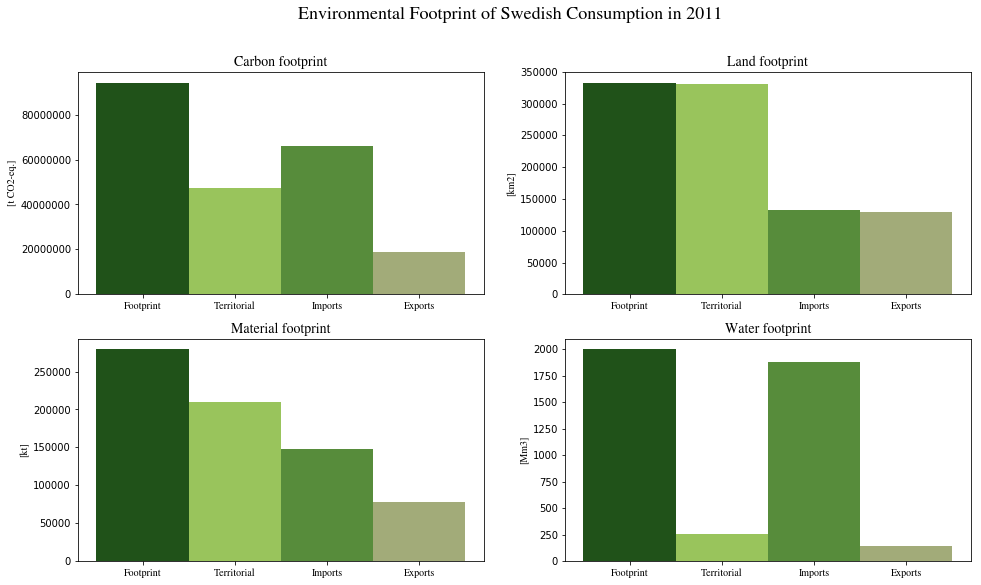

In [48]:
#Creating four subplots (Carbon footprint, Land footprint, Material footprint and Water footprint) with each containing four bars: Footprint, Territorial, Imports, Exports

accounts = ['Footprint','Territorial','Imports', 'Exports']
position = [0,1,2,3]

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.bar(x=position, height = [Footprint_gwp, Territorial_gwp, Imports_gwp, Exports_gwp],width=1, color=['#205219','#99C45C','#578C3B','#A2AB79'])
plt.title('Carbon footprint',fontsize=14,fontname='STIXGeneral')
plt.ylabel('[t CO2-eq.]',fontname='STIXGeneral')
plt.xticks(position, accounts, fontname='STIXGeneral')
plt.ticklabel_format(axis='y',style='plain')


plt.subplot(2, 2, 2)
plt.bar(x=position, height = [Footprint_land, Territorial_land, Imports_land, Exports_land],width=1, color=['#205219','#99C45C','#578C3B','#A2AB79'])
plt.title('Land footprint',fontsize=14,fontname='STIXGeneral')
plt.ylabel('[km2]',fontname='STIXGeneral')
plt.xticks(position, accounts,fontname='STIXGeneral')

plt.subplot(2, 2, 3)
plt.bar(x=position, height = [Footprint_material, Territorial_material, Imports_material, Exports_material],width=1, color=['#205219','#99C45C','#578C3B','#A2AB79'])
plt.title('Material footprint',fontsize=14,fontname='STIXGeneral')
plt.ylabel('[kt]',fontname='STIXGeneral')
plt.xticks(position, accounts,fontname='STIXGeneral')

plt.subplot(2, 2, 4)
plt.bar(x=position, height = [Footprint_water, Territorial_water, Imports_water, Exports_water],width=1, color=['#205219','#99C45C','#578C3B','#A2AB79'])
plt.title('Water footprint',fontsize=14,fontname='STIXGeneral')
plt.ylabel('[Mm3]',fontname='STIXGeneral')
plt.xticks(position, accounts,fontname='STIXGeneral')

# # Create the legend
# fig.legend(loc="center right",   # Position of legend
#            borderaxespad=0.1,    # Small spacing around legend box
#            title="Legend"  # Title for the legend
#            )
fig.suptitle('Environmental Footprint of Swedish Consumption in 2011',fontsize=18, fontname='STIXGeneral')
# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
plt.subplots_adjust(right=0.90)
plt.show()

This code constructes normalised stacked barcharts withthe four enironmental footprints for the whole exiobase, aggregate to the three regions ```SE```,```EU``` & ```RoW```.

In [49]:
d = {'Carbon footprint': [Footprint_gwp, Territorial_gwp,Imports_gwp,Exports_gwp], 'Land footprint': [Footprint_land, Territorial_land,Imports_land,Exports_land], 'Material Footprint':[Footprint_material,Territorial_material,Imports_material,Exports_material], 'Water footprint':[Footprint_water,Territorial_water,Imports_water,Exports_water]}
df = pd.DataFrame(data=d,index=['Footprint','Territorial','Imports','Exports'])
df

,Carbon footprint,Land footprint,Material Footprint,Water footprint
Footprint,9.426935e+07,333093.492886,279177.080463,1998.758571
Territorial,4.711316e+07,330214.788647,209545.575857,257.842298
Imports,6.593233e+07,132004.223123,147767.010839,1883.966173
Exports,1.877614e+07,129125.518884,78135.506233,143.049900


# RO 2.0 Develop a methodological framework to link Swedish household expenditure surveys to environmentally extended input-output tables to analysis the environmental impacts of Swedish Households

## RO 2.1 Adjusting Household Budget Survey

Read the .csv file with the Swedish average expenditure data and the tax multiplier

In [50]:
Swedish_HBS = pd.read_csv('C:/Users/tobia/Dropbox/KTH Sustainable Technology/4_AL250X_Degree Project in Strategies for Sustainable Development/9. Sharing Sjoerd/Expenditure_categories_eng.csv',';', index_col = [0,1,2,3])
# Command for display all columns and rows
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
 #   display(Swedish_HBS)
Swedish_HBS

Expenditure [SEK]
Division                                           Group                                              Class                                              Sub-class                          
Food                                               Bread and cereals                                  Rice and products of rice                          Rice                            130
                                                                                                                                                         Products of rice                120
                                                                                                      Pasta products                                     NaN                             410
                                                                                                      Flour, grain                                       NaN                             710
                                                                                                      Bread                                              Hard bread                      320
                                                                                                                                                         Soft white bread                540
                                                                                                                                                         Soft brown bread                420
                                                                                                                                                         Soft light bread                650
                                                                                                                                                         Other bread                     420
                                                                                                      Pastry products                                    NaN                            1750
                                                   Meat                                               Fresh, chilled or frozen meat of bovine animals    NaN                             940
                                                                                                      Fresh, chilled or frozen meat of pig               NaN                            1200
                                                                                                      Fresh, chilled or frozen meat of sheep and goat    NaN                             230
                                                                                                      Fresh, chilled or frozen meat of poultry           NaN                             730
                                                                                                      Dried, salted or smoked meat and edible meat offal NaN                              20
                                                                                                      Dried, salted or smoked meat of pig                NaN                            1390
                                                                                                      Dried, salted or smoked other meats                NaN                             230
                                                                                                      Meat, sausages and meat of sandwiches              NaN                            1020
                                                                                                      Pastry, cured meats and provisions                 NaN                             340
                                                                                                      Meat dishes                                        NaN                             360
             

In [51]:
# Multiplying the HBS_final with the vector of 1.17 to address the problem of underreporting of 15%. All expenditures were multiplied by this factor.

Swedish_HBS_ur = Swedish_HBS*1.17
Swedish_HBS_ur

Expenditure [SEK]
Division                                           Group                                              Class                                              Sub-class                          
Food                                               Bread and cereals                                  Rice and products of rice                          Rice                          152.1
                                                                                                                                                         Products of rice              140.4
                                                                                                      Pasta products                                     NaN                           479.7
                                                                                                      Flour, grain                                       NaN                           830.7
                                                                                                      Bread                                              Hard bread                    374.4
                                                                                                                                                         Soft white bread              631.8
                                                                                                                                                         Soft brown bread              491.4
                                                                                                                                                         Soft light bread              760.5
                                                                                                                                                         Other bread                   491.4
                                                                                                      Pastry products                                    NaN                          2047.5
                                                   Meat                                               Fresh, chilled or frozen meat of bovine animals    NaN                          1099.8
                                                                                                      Fresh, chilled or frozen meat of pig               NaN                          1404.0
                                                                                                      Fresh, chilled or frozen meat of sheep and goat    NaN                           269.1
                                                                                                      Fresh, chilled or frozen meat of poultry           NaN                           854.1
                                                                                                      Dried, salted or smoked meat and edible meat offal NaN                            23.4
                                                                                                      Dried, salted or smoked meat of pig                NaN                          1626.3
                                                                                                      Dried, salted or smoked other meats                NaN                           269.1
                                                                                                      Meat, sausages and meat of sandwiches              NaN                          1193.4
                                                                                                      Pastry, cured meats and provisions                 NaN                           397.8
                                                                                                      Meat dishes                                        NaN                           421.2
             

In [52]:
# Importing the vector out of the tax_multiplier.csv file
Tax_Multiplier = pd.read_csv('C:/Users/tobia/Dropbox/KTH Sustainable Technology/4_AL250X_Degree Project in Strategies for Sustainable Development/9. Sharing Sjoerd/tax_multiplier_eng.csv',';',header=[0], index_col=[0,1,2,3])
Tax_Multiplier

HBS tax multiplier
Division                                           Group                                              Class                                              Sub-class                           
Food                                               Bread and cereals                                  Rice and products of rice                          Rice                        0.892857
                                                                                                                                                         Products of rice            0.892857
                                                                                                      Pasta products                                     NaN                         0.892857
                                                                                                      Flour, grain                                       NaN                         0.892857
                                                                                                      Bread                                              Hard bread                  0.892857
                                                                                                                                                         Soft white bread            0.892857
                                                                                                                                                         Soft brown bread            0.892857
                                                                                                                                                         Soft light bread            0.892857
                                                                                                                                                         Other bread                 0.892857
                                                                                                      Pastry products                                    NaN                         0.892857
                                                   Meat                                               Fresh, chilled or frozen meat of bovine animals    NaN                         0.892857
                                                                                                      Fresh, chilled or frozen meat of pig               NaN                         0.892857
                                                                                                      Fresh, chilled or frozen meat of sheep and goat    NaN                         0.892857
                                                                                                      Fresh, chilled or frozen meat of poultry           NaN                         0.892857
                                                                                                      Dried, salted or smoked meat and edible meat offal NaN                         0.892857
                                                                                                      Dried, salted or smoked meat of pig                NaN                         0.892857
                                                                                                      Dried, salted or smoked other meats                NaN                         0.892857
                                                                                                      Meat, sausages and meat of sandwiches              NaN                         0.892857
                                                                                                      Pastry, cured meats and provisions                 NaN                         0.892857
                                                                                                      Meat dishes                                        NaN                         

In [53]:
# Multiply the Swedish_HBS with the average exchange rate from SEK to EUR: 0.10218
Swedish_HBS_Euro = Swedish_HBS_ur.multiply(0.10218)
Swedish_HBS_Euro

Expenditure [SEK]
Division                                           Group                                              Class                                              Sub-class                          
Food                                               Bread and cereals                                  Rice and products of rice                          Rice                      15.541578
                                                                                                                                                         Products of rice          14.346072
                                                                                                      Pasta products                                     NaN                       49.015746
                                                                                                      Flour, grain                                       NaN                       84.880926
                                                                                                      Bread                                              Hard bread                38.256192
                                                                                                                                                         Soft white bread          64.557324
                                                                                                                                                         Soft brown bread          50.211252
                                                                                                                                                         Soft light bread          77.707890
                                                                                                                                                         Other bread               50.211252
                                                                                                      Pastry products                                    NaN                      209.213550
                                                   Meat                                               Fresh, chilled or frozen meat of bovine animals    NaN                      112.377564
                                                                                                      Fresh, chilled or frozen meat of pig               NaN                      143.460720
                                                                                                      Fresh, chilled or frozen meat of sheep and goat    NaN                       27.496638
                                                                                                      Fresh, chilled or frozen meat of poultry           NaN                       87.271938
                                                                                                      Dried, salted or smoked meat and edible meat offal NaN                        2.391012
                                                                                                      Dried, salted or smoked meat of pig                NaN                      166.175334
                                                                                                      Dried, salted or smoked other meats                NaN                       27.496638
                                                                                                      Meat, sausages and meat of sandwiches              NaN                      121.941612
                                                                                                      Pastry, cured meats and provisions                 NaN                       40.647204
                                                                                                      Meat dishes                                        NaN                       43.038216
             

In [54]:
# Adjusting the Swedish HBS in Euros to inflation, according to the CPI: 1.05
Swedish_HBS_Euro_adjusted = Swedish_HBS_Euro.multiply(1.05)
Swedish_HBS_Euro_adjusted

Expenditure [SEK]
Division                                           Group                                              Class                                              Sub-class                          
Food                                               Bread and cereals                                  Rice and products of rice                          Rice                      16.318657
                                                                                                                                                         Products of rice          15.063376
                                                                                                      Pasta products                                     NaN                       51.466533
                                                                                                      Flour, grain                                       NaN                       89.124972
                                                                                                      Bread                                              Hard bread                40.169002
                                                                                                                                                         Soft white bread          67.785190
                                                                                                                                                         Soft brown bread          52.721815
                                                                                                                                                         Soft light bread          81.593285
                                                                                                                                                         Other bread               52.721815
                                                                                                      Pastry products                                    NaN                      219.674228
                                                   Meat                                               Fresh, chilled or frozen meat of bovine animals    NaN                      117.996442
                                                                                                      Fresh, chilled or frozen meat of pig               NaN                      150.633756
                                                                                                      Fresh, chilled or frozen meat of sheep and goat    NaN                       28.871470
                                                                                                      Fresh, chilled or frozen meat of poultry           NaN                       91.635535
                                                                                                      Dried, salted or smoked meat and edible meat offal NaN                        2.510563
                                                                                                      Dried, salted or smoked meat of pig                NaN                      174.484101
                                                                                                      Dried, salted or smoked other meats                NaN                       28.871470
                                                                                                      Meat, sausages and meat of sandwiches              NaN                      128.038693
                                                                                                      Pastry, cured meats and provisions                 NaN                       42.679564
                                                                                                      Meat dishes                                        NaN                       45.190127
             

In [55]:
# Renaming the header of the Swedish_HBS_Euro_adjusted to Expenditure in Euro [€]
Swedish_HBS_Euro_adjusted.rename(columns={'Expenditure [SEK]':'Expenditure [EUR]'}, inplace=True)
Swedish_HBS_Euro_adjusted

Expenditure [EUR]
Division                                           Group                                              Class                                              Sub-class                          
Food                                               Bread and cereals                                  Rice and products of rice                          Rice                      16.318657
                                                                                                                                                         Products of rice          15.063376
                                                                                                      Pasta products                                     NaN                       51.466533
                                                                                                      Flour, grain                                       NaN                       89.124972
                                                                                                      Bread                                              Hard bread                40.169002
                                                                                                                                                         Soft white bread          67.785190
                                                                                                                                                         Soft brown bread          52.721815
                                                                                                                                                         Soft light bread          81.593285
                                                                                                                                                         Other bread               52.721815
                                                                                                      Pastry products                                    NaN                      219.674228
                                                   Meat                                               Fresh, chilled or frozen meat of bovine animals    NaN                      117.996442
                                                                                                      Fresh, chilled or frozen meat of pig               NaN                      150.633756
                                                                                                      Fresh, chilled or frozen meat of sheep and goat    NaN                       28.871470
                                                                                                      Fresh, chilled or frozen meat of poultry           NaN                       91.635535
                                                                                                      Dried, salted or smoked meat and edible meat offal NaN                        2.510563
                                                                                                      Dried, salted or smoked meat of pig                NaN                      174.484101
                                                                                                      Dried, salted or smoked other meats                NaN                       28.871470
                                                                                                      Meat, sausages and meat of sandwiches              NaN                      128.038693
                                                                                                      Pastry, cured meats and provisions                 NaN                       42.679564
                                                                                                      Meat dishes                                        NaN                       45.190127
             

In [56]:
# Multipyling the Tax_Multiplier vector with the adjusted HBS in Euro
Swedish_HBS_final = pd.DataFrame(Swedish_HBS_Euro_adjusted.values*Tax_Multiplier.values, columns=Swedish_HBS_Euro_adjusted.columns, index=Swedish_HBS_Euro_adjusted.index)
Swedish_HBS_final.groupby(level=0, sort=False).sum()

,Expenditure [EUR]
Division,
Food,3719.891639
Non-alcoholic beverages,289.163014
Meals out,1163.376776
Alcoholic beverages (with light beer),390.643541
Tobacco,201.849233
Consumer goods,582.450523
Household services,1082.554593
Clothing and footwear,1547.806675
Housing,6988.402053


Multipyling the adjusted final demand file HBS with the concordance matrix to map all the EXIOBASE products to the Swedish HBS cateogries.

In [57]:
concordance = pd.read_csv('C:/Users/tobia/Dropbox/KTH Sustainable Technology/4_AL250X_Degree Project in Strategies for Sustainable Development/9. Sharing Sjoerd/Concordance_exio_HBS_eng.csv',';', header = [0,1,2,3], index_col = [0])
concordance.index
concordance.columns
concordance_t =concordance.T
concordance_t

Paddy rice  \
Division                                           Group                                              Class                                              Sub-Class                          
Food                                               Bread and cereals                                  Rice and products of rice                          Rice                         0.0   
                                                                                                                                                         Products of rice             0.0   
                                                                                                      Pasta products                                     Unnamed: 3_level_3           0.0   
                                                                                                      Flour, grain                                       Unnamed: 4_level_3           0.0   
                                                                                                      Bread                                              Hard bread                   0.0   
                                                                                                                                                         Soft white bread             0.0   
                                                                                                                                                         Soft brown bread             0.0   
                                                                                                                                                         Soft light bread             0.0   
                                                                                                                                                         Other bread                  0.0   
                                                                                                      Pastry products                                    Unnamed: 10_level_3          0.0   
                                                   Meat                                               Fresh, chilled or frozen meat of bovine animals    Unnamed: 11_level_3          0.0   
                                                                                                      Fresh, chilled or frozen meat of pig               Unnamed: 12_level_3          0.0   
                                                                                                      Fresh, chilled or frozen meat of sheep and goat    Unnamed: 13_level_3          0.0   
                                                                                                      Fresh, chilled or frozen meat of poultry           Unnamed: 14_level_3          0.0   
                                                                                                      Dried, salted or smoked meat and edible meat offal Unnamed: 15_level_3          0.0   
                                                                                                      Dried, salted or smoked meat of pig                Unnamed: 16_level_3          0.0   
                                                                                                      Dried, salted or smoked other meats                Unnamed: 17_level_3          0.0   
                                                                                                      Meat, sausages and meat of sandwiches              Unnamed: 18_level_3          0.0   
                                                                                                      Pastry, cured meats and provisions                 Unnamed: 19_level_3          0.0   
                                                                                                      Meat dishes                                        Unnamed: 20_level_3          0.0   
                 

## 2.2 RO2: Adjusting the Multiplier File
Adjusting the multiplier file M.txt according to the share of the products and its contribution to the final demand Y.txt

In [58]:
# Isolating the Swedish Final Demand for Households
FD_SE=SE_aggr.Y.iloc[:,0]
FD_SE

# Group the Final Demand on the Index level 1 (Products) and sum them up.

FD_SE_Tot=FD_SE.groupby(level=1, sort=False).sum()
FD_SE_Tot
#Check if adding the wheat by grouping and ccompare with the FD_SE_Tot:
SE_aggr.Y.iloc[[1,201,401],0]

print('The sum of the final demand of wheat is the same:', SE_aggr.Y.iloc[[1,201,401],0].sum() == FD_SE_Tot.loc['Wheat'])

# Another way of checking if all the results are correct

Check = 0
for product in range (0,200):
    if FD_SE_Tot.iloc[product] == SE_aggr.Y.iloc[[product, (200+product), (400+product)],0].sum():
        Check+=1
        continue
Check
if Check == 200:print('The aggregation worked!')

The sum of the final demand of wheat is the same: True
The aggregation worked!


After summing up the Final demand file, a new file ``Y_ratio`` was created with the fraction of the final demand from SE, EU, or Row. 

In [59]:
# Multiply the FD_SE_Tot_600 times 3 and create a dataframe with 600 products and the correct index.

FD_SE_Tot_600 = pd.concat(3*[FD_SE_Tot])
# Test if the products 
    # FD_SE_Tot_600
    # FD_SE_Tot_600[0]==FD_SE_Tot_600[200] == FD_SE_Tot_600[400]
FD_SE_Tot_600.index = FD_SE.index

Y_Ratios = FD_SE.div(FD_SE_Tot_600)
Y_Ratios[0]+Y_Ratios[200]+Y_Ratios[400]

Y_Ratios

region  sector                                                                              
SE      Paddy rice                                                                              0.000000
        Wheat                                                                                   0.904045
        Cereal grains nec                                                                       0.938465
        Vegetables, fruit, nuts                                                                 0.183553
        Oil seeds                                                                               0.670358
        Sugar cane, sugar beet                                                                       NaN
        Plant-based fibers                                                                           NaN
        Crops nec                                                                               0.161088
        Cattle                                                     

In [60]:
# Filling missing values with 0

Y_Ratios = Y_Ratios.fillna(0)
    #Test if it worked
        #Check if it adds up to 1
        #Y_Ratios[0]+Y_Ratios[200]+Y_Ratios[400]

# Compare the different products and check if the sum up correctily

Ones = 0
Zeroes = 0
Almost = 0

for product in range(0,200):
    if Y_Ratios[[product,(200+product),(400+product)]].sum() == 1:
        Ones+=1
    elif Y_Ratios[[product,(200+product),(400+product)]].sum() == 0:
        if concordance.T.sum()[product] !=0:
            print(str(Y_Ratios[[product,(200+product),(400+product)]])+ "\n")
            print( "There's a problem with the " + str(concordance.index[product])+" Exiobase product:")
           #print ("It's used in " + str(concordance.T.index[product]))
            print("It accounts for " + str(concordance.T.sum()[product])+ " of one HBS product or more \n")
        Zeroes+=1
    elif Y_Ratios[[product,(200+product),(400+product)]].sum() != 1:
        #print(Y_Ratios[[product,(200+product),(400+product)]].sum())
        #print(Y_Ratios[[product,(200+product),(400+product)]])
        Almost+=1

print("\n" + str(Ones) + " Products that add up to 1\n")
print(str(Zeroes) + " Products are unconsumed by households (add up to 0)\n")
print(str(Almost) + " Products are close to 1, but have a rounding error.\n")


91 Products that add up to 1

84 Products are unconsumed by households (add up to 0)

25 Products are close to 1, but have a rounding error.



The errors occuring above are used EXIOBASE products with no Final Demand for Households in Sweden and therefore no Multiplier.
    
    region  sector            
    SE      Plant-based fibers    0.0
    EU      Plant-based fibers    0.0
    RoW     Plant-based fibers    0.0
    Name: (SE, Final consumption expenditure by households), dtype: float64

    There's a problem with the Plant-based fibers Exiobase product:
    It accounts for 0.30000000000000004 of one HBS product or more 

Plant-based fibres replaced with ``paper and paper products``

    region  sector         
    SE      Plastics, basic    0.0
    EU      Plastics, basic    0.0
    RoW     Plastics, basic    0.0
    Name: (SE, Final consumption expenditure by households), dtype: float64

    There's a problem with the Plastics, basic Exiobase product:
    It accounts for 0.5 of one HBS product or more 
    
``Plastics, basic`` is replaced with ``Rubber and plastic products (25)``

    region  sector                                                           
    SE      Collected and purified water, distribution services of water (41)    0.0
    EU      Collected and purified water, distribution services of water (41)    0.0
    RoW     Collected and purified water, distribution services of water (41)    0.0
    Name: (SE, Final consumption expenditure by households), dtype: float64

    There's a problem with the Collected and purified water, distribution services of water (41) Exiobase product:
    It accounts for 1.0 of one HBS product or more 

``Collected and purified water, distribution services of water (41)`` is replaced with ``Steam and hot water supply services``


In this step it needs to be checked if the 84 products unconsumed by households, are used in the concordance file. Otherwise it will be multiplied with 0 and end the impacts will result as zero.

After creating the ratios, we can multiply the ratio file with the ``M.txt`` file to create the adjusted multiplier file. Multiplier file is in 1MEUR so the matrix need to be divided by 0ne million to adjust it to multiplier per Eur.

In [61]:
M_SE_EUR = SE_aggr.satellite.M.divide(1000000)
M_SE_adj = M_SE_EUR.multiply(Y_Ratios)
M_SE_adj.T

M_SE_adj_grouped = M_SE_adj.T.groupby(level=1,sort=False).sum()
M_SE_adj_grouped

,Taxes less subsidies on products purchased: Total,Other net taxes on production,"Compensation of employees; wages, salaries, & employers social contributions: Low-skilled","Compensation of employees; wages, salaries, & employers social contributions: Medium-skilled","Compensation of employees; wages, salaries, & employers social contributions: High-skilled",Operating surplus: Consumption of fixed capital,Operating surplus: Rents on land,Operating surplus: Royalties on resources,Operating surplus: Remaining net operating surplus,Employment: Low-skilled male,...,Water Withdrawal Blue - Electricity - once-through - Electricity by hydro,Water Withdrawal Blue - Electricity - once-through - Electricity by wind,Water Withdrawal Blue - Electricity - once-through - Electricity by petroleum and other oil derivatives,Water Withdrawal Blue - Electricity - once-through - Electricity by biomass and waste,Water Withdrawal Blue - Electricity - once-through - Electricity by solar photovoltaic,Water Withdrawal Blue - Electricity - once-through - Electricity by solar thermal,"Water Withdrawal Blue - Electricity - once-through - Electricity by tide, wave, ocean",Water Withdrawal Blue - Electricity - once-through - Electricity by Geothermal,Water Withdrawal Blue - Electricity - once-through - Electricity nec,Water Withdrawal Blue - Domestic - domestic Water Withdrawal Blue
sector,,,,,,,,,,,,,,,,,,,,,
Paddy rice,1.286576e-08,2.641363e-08,2.696499e-08,1.058415e-07,6.599903e-08,2.177788e-07,0.0,0.0,5.441363e-07,3.687352e-09,...,0.0,0.0,4.374888e-11,6.376641e-12,0.0,0.0,0.0,4.087753e-13,0.0,0.0
Wheat,1.081643e-07,-4.398411e-08,2.063733e-08,2.734194e-07,1.387227e-07,3.227823e-07,0.0,0.0,1.802581e-07,3.017314e-09,...,0.0,0.0,2.073640e-10,3.063934e-11,0.0,0.0,0.0,2.598625e-12,0.0,0.0
Cereal grains nec,1.011903e-07,-6.348476e-08,2.098466e-08,3.239947e-07,1.421072e-07,3.015066e-07,0.0,0.0,1.737013e-07,1.625998e-09,...,0.0,0.0,1.692215e-10,3.700662e-11,0.0,0.0,0.0,2.041620e-12,0.0,0.0
"Vegetables, fruit, nuts",3.782212e-08,3.599368e-09,4.040890e-08,2.768941e-07,9.237096e-08,1.895675e-07,0.0,0.0,3.593371e-07,2.715066e-08,...,0.0,0.0,4.511342e-10,7.919461e-11,0.0,0.0,0.0,2.150868e-12,0.0,0.0
Oil seeds,3.301464e-08,-2.360716e-08,3.010021e-08,4.886395e-07,1.134341e-07,1.933613e-07,0.0,0.0,1.650574e-07,7.205884e-09,...,0.0,0.0,1.090632e-10,2.003973e-11,0.0,0.0,0.0,1.447809e-12,0.0,0.0
"Sugar cane, sugar beet",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0
Plant-based fibers,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0
Crops nec,6.548772e-08,3.915386e-10,5.217912e-08,3.484955e-07,8.923283e-08,1.582004e-07,0.0,0.0,2.860129e-07,5.593639e-08,...,0.0,0.0,5.280312e-10,3.046918e-11,0.0,0.0,0.0,9.707924e-12,0.0,0.0
Cattle,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,...,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0


In [62]:
# The name of 'sector' can be removed
M_SE = M_SE_adj_grouped.rename_axis(index=None, columns=None)
M_SE_t = M_SE.T
M_SE_t.columns.equals(concordance.index)
M_SE_t

,Paddy rice,Wheat,Cereal grains nec,"Vegetables, fruit, nuts",Oil seeds,"Sugar cane, sugar beet",Plant-based fibers,Crops nec,Cattle,Pigs,...,Paper for treatment: landfill,Plastic waste for treatment: landfill,Inert/metal/hazardous waste for treatment: landfill,Textiles waste for treatment: landfill,Wood waste for treatment: landfill,Membership organisation services n.e.c. (91),"Recreational, cultural and sporting services (92)",Other services (93),Private households with employed persons (95),Extra-territorial organizations and bodies
Taxes less subsidies on products purchased: Total,1.286576e-08,1.081643e-07,1.011903e-07,3.782212e-08,3.301464e-08,0.0,0.0,6.548772e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.030824e-08,4.911997e-08,2.752545e-08,1.623382e-09,0.0
Other net taxes on production,2.641363e-08,-4.398411e-08,-6.348476e-08,3.599368e-09,-2.360716e-08,0.0,0.0,3.915386e-10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.240339e-08,1.713359e-08,2.979429e-08,4.458611e-08,0.0
"Compensation of employees; wages, salaries, & employers social contributions: Low-skilled",2.696499e-08,2.063733e-08,2.098466e-08,4.040890e-08,3.010021e-08,0.0,0.0,5.217912e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.297335e-08,2.374003e-08,1.954562e-08,4.459507e-08,0.0
"Compensation of employees; wages, salaries, & employers social contributions: Medium-skilled",1.058415e-07,2.734194e-07,3.239947e-07,2.768941e-07,4.886395e-07,0.0,0.0,3.484955e-07,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.909548e-07,2.079681e-07,1.849134e-07,3.794495e-07,0.0
"Compensation of employees; wages, salaries, & employers social contributions: High-skilled",6.599903e-08,1.387227e-07,1.421072e-07,9.237096e-08,1.134341e-07,0.0,0.0,8.923283e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.765786e-07,2.649549e-07,2.265964e-07,5.185675e-07,0.0
Operating surplus: Consumption of fixed capital,2.177788e-07,3.227823e-07,3.015066e-07,1.895675e-07,1.933613e-07,0.0,0.0,1.582004e-07,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.092006e-07,1.653885e-07,9.198943e-08,4.302184e-09,0.0
Operating surplus: Rents on land,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
Operating surplus: Royalties on resources,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
Operating surplus: Remaining net operating surplus,5.441363e-07,1.802581e-07,1.737013e-07,3.593371e-07,1.650574e-07,0.0,0.0,2.860129e-07,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.275810e-07,2.716949e-07,4.196354e-07,6.876287e-09,0.0
Employment: Low-skilled male,3.687352e-09,3.017314e-09,1.625998e-09,2.715066e-08,7.205884e-09,0.0,0.0,5.593639e-08,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.863009e-10,9.988702e-10,6.038437e-10,1.621984e-10,0.0


In [85]:

M_file=M_SE.dot(characterisation_HBS.T)
M_file.to_csv('C:/Users/tobia/Dropbox/KTH Sustainable Technology/4_AL250X_Degree Project in Strategies for Sustainable Development/9. Sharing Sjoerd/M_file.csv',';')

In [64]:
# Searching for differences in the two indexes
len(list(set(concordance.index) - set(M_SE.columns)))

for var in range(0,200):
    if concordance.index[var] != M_SE_t.columns[var]:
        print(concordance.index[var] + " \n " + M_SE_t.columns[var] + '\n \n')

In [65]:
# Multiplying the two matrices to get stressors per HBS category
HBS_stressor = M_SE_t.dot(concordance)
HBS_stressor_t = HBS_stressor.T
HBS_stressor_t.index = Swedish_HBS_final.index.copy()
HBS_stressor_t

Taxes less subsidies on products purchased: Total  \
Division                                           Group                                              Class                                              Sub-class                                                             
Food                                               Bread and cereals                                  Rice and products of rice                          Rice                                                   5.232082e-08   
                                                                                                                                                         Products of rice                                       5.232082e-08   
                                                                                                      Pasta products                                     NaN                                                    1.081643e-07   
                                                                                                      Flour, grain                                       NaN                                                    1.081643e-07   
                                                                                                      Bread                                              Hard bread                                             1.074669e-07   
                                                                                                                                                         Soft white bread                                       1.074669e-07   
                                                                                                                                                         Soft brown bread                                       1.074669e-07   
                                                                                                                                                         Soft light bread                                       1.074669e-07   
                                                                                                                                                         Other bread                                            1.074669e-07   
                                                                                                      Pastry products                                    NaN                                                    1.002993e-07   
                                                   Meat                                               Fresh, chilled or frozen meat of bovine animals    NaN                                                    7.818116e-08   
                                                                                                      Fresh, chilled or frozen meat of pig               NaN                                                    9.492585e-08   
                                                                                                      Fresh, chilled or frozen meat of sheep and goat    NaN                                                    5.292412e-08   
                                                                                                      Fresh, chilled or frozen meat of poultry           NaN                                                    4.997277e-08   
                                                                                                      Dried, salted or smoked meat and edible meat offal NaN                                                    7.818116e-08   
                                                                                                      Dried, salted or smoked meat of pig                NaN                                                    9.492585e-08   
                                                                                                      Dried, salted or smoked other meats  

## RO 2.3 Muliplying Stressor/HBS and Final Demand/HBS
Multiplying the ``HBS_stressor`` (containing stressors in HBS) and the ``HBS_final`` to get the multipliers according to the HBS categories ``FD_HBS``.

Check for same indices in the two matrices ``HBS_final`` and ``HBS_stressor``.

In [66]:
# This code block checks if both matrices contain the same names and amount of indices in the two variables.
#If yes, it will print: 'Correct amount of strings in Tuples)' if not it will print the conflicting names.
Success = 0
Floats = 0
for tup in range(0,120):
    for string in range(0, 4):
        if isinstance(Swedish_HBS_final.index[tup][string], float) == True:
            Floats += 1
            continue
        elif Swedish_HBS_final.index[tup][string] != HBS_stressor_t.index[tup][string]:
            print("HBS_final: " + Swedish_HBS_final.index[tup][string] + " \n\n HBS_stressor: " + HBS_stressor_t.index[tup][string] + '\n \n')
        elif Swedish_HBS_final.index[tup][string] == HBS_stressor_t.index[tup][string]:
            Success += 1
            #print('String pair ' + str(Success) + ' are the same!')
if Success + Floats == 480: print('Correct amount of strings in Tuples (480)')

Correct amount of strings in Tuples (480)


The matrices ``Swedish_HBS_final`` can be multiplied with ``HBS_stressors`` to get the total environmental stressors per HBS category in the variable ``FD_HBS``.

In [67]:
FD_HBS = HBS_stressor_t * Swedish_HBS_final.values
FD_HBS

Taxes less subsidies on products purchased: Total  \
Division                                           Group                                              Class                                              Sub-class                                                             
Food                                               Bread and cereals                                  Rice and products of rice                          Rice                                                   7.623264e-07   
                                                                                                                                                         Products of rice                                       7.036859e-07   
                                                                                                      Pasta products                                     NaN                                                    4.970395e-06   
                                                                                                      Flour, grain                                       NaN                                                    8.607269e-06   
                                                                                                      Bread                                              Hard bread                                             3.854320e-06   
                                                                                                                                                         Soft white bread                                       6.504165e-06   
                                                                                                                                                         Soft brown bread                                       5.058795e-06   
                                                                                                                                                         Soft light bread                                       7.829087e-06   
                                                                                                                                                         Other bread                                            5.058795e-06   
                                                                                                      Pastry products                                    NaN                                                    1.967247e-05   
                                                   Meat                                               Fresh, chilled or frozen meat of bovine animals    NaN                                                    8.236695e-06   
                                                                                                      Fresh, chilled or frozen meat of pig               NaN                                                    1.276700e-05   
                                                                                                      Fresh, chilled or frozen meat of sheep and goat    NaN                                                    1.364283e-06   
                                                                                                      Fresh, chilled or frozen meat of poultry           NaN                                                    4.088645e-06   
                                                                                                      Dried, salted or smoked meat and edible meat offal NaN                                                    1.752488e-07   
                                                                                                      Dried, salted or smoked meat of pig                NaN                                                    1.478844e-05   
                                                                                                      Dried, salted or smoked other meats  

## RO 2.4 Characterisation
The result needs to be characterised in the four environmental footprint in ```FD_HBS_chr```  For this step the same characterisation factors as in RO1.3 are used, based on Steinmann et al. (2018). The output lists the four environmental footprint of all the HBS categories.
It is important to note that the following units apply:
>Carbon footprint: t CO2 eq.  
>Land footprint: 1000m2  
>Material footprint: t  
>Water footprint: m3  

In furhter steps the units are adjusted to common units as: kg CO2 eq., km2, t, m3


In [68]:
# Multiplication of the transposed characterisation-file with the final HBS data. 

characterisation_HBS = pd.read_csv('C:/Users/tobia/Dropbox/KTH Sustainable Technology/4_AL250X_Degree Project in Strategies for Sustainable Development/9. Sharing Sjoerd/CF_HBS.csv',';', header=[0], index_col = [0])
characterisation_HBS


FD_HBS_chr = FD_HBS.dot(characterisation_HBS.T)


# Use the groupby() and sum() function to sum up specific columns.
FD_HBS_chr.groupby(level=0, sort=False).sum().iloc[:,0].sum()
FD_HBS_chr.groupby(level=1,sort=False).sum()

,Carbon Footprint [t CO2-eq.],Land footprint [1000 m2],Material footprint [t],Water footprint [m3]
Group,,,,
Bread and cereals,0.666702,9.023251,2.690926,58.043857
Meat,0.346929,1.922364,1.080250,11.349231
Fish and seafood,0.202018,0.553452,0.436280,13.964317
"Milk, cheese and eggs",0.647422,2.698919,0.705638,8.721652
Oils and fats,0.074179,0.451474,0.164503,5.659828
Fruit and berries,0.136238,0.772888,0.884052,39.599885
Vegetables,0.180385,1.023336,1.170522,52.431903
Sugar and sweets,0.176665,0.860486,2.030034,26.326749
"Sauces, spices",0.041248,0.278231,0.116773,4.492206


In [69]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(FD_HBS_chr)

Carbon Footprint [t CO2-eq.]  \
Division                                           Group                                              Class                                              Sub-class                                        
Food                                               Bread and cereals                                  Rice and products of rice                          Rice                                  0.027528   
                                                                                                                                                         Products of rice                      0.025411   
                                                                                                      Pasta products                                     NaN                                   0.050305   
                                                                                                      Flour, grain                                       NaN                                   0.087114   
                                                                                                      Bread                                              Hard bread                            0.039482   
                                                                                                                                                         Soft white bread                      0.066627   
                                                                                                                                                         Soft brown bread                      0.051821   
                                                                                                                                                         Soft light bread                      0.080199   
                                                                                                                                                         Other bread                           0.051821   
                                                                                                      Pastry products                                    NaN                                   0.186393   
                                                   Meat                                               Fresh, chilled or frozen meat of bovine animals    NaN                                   0.134960   
                                                                                                      Fresh, chilled or frozen meat of pig               NaN                                   0.045547   
                                                                                                      Fresh, chilled or frozen meat of sheep and goat    NaN                                   0.008850   
                                                                                                      Fresh, chilled or frozen meat of poultry           NaN                                   0.022294   
                                                                                                      Dried, salted or smoked meat and edible meat offal NaN                                   0.002871   
                                                                                                      Dried, salted or smoked meat of pig                NaN                                   0.052758   
                                                                                                      Dried, salted or smoked other meats                NaN                                   0.008850   
                                                                                                      Meat, sausages and meat of sandwiches              NaN                                   0.039248   
                                                                                                      Pastry, c

## RO 2.5 Visualisation of the Results

In a next step the results of the calculations ```FD_HBS_chr``` are visualised in different ways. First in a Treemap, and afterwards in a Treemap with tree subplots.

In [70]:
# Here is the raw data shown, with the groupby() & sum(), the different levels (e.g. 'Divisions') can be summed up.

data_test=FD_HBS_chr.groupby(level=0,sort=False).sum()
data_test

,Carbon Footprint [t CO2-eq.],Land footprint [1000 m2],Material footprint [t],Water footprint [m3]
Division,,,,
Food,2.591827,18.136520,9.622024,229.201305
Non-alcoholic beverages,0.211603,0.622860,0.435789,76.416089
Meals out,0.281836,0.786523,0.478641,8.966053
Alcoholic beverages (with light beer),0.152785,0.543026,0.412350,9.284145
Tobacco,0.087985,0.110244,0.085844,15.419551
Consumer goods,0.395019,2.058485,1.246257,9.451295
Household services,0.119614,0.324166,0.196635,1.360278
Clothing and footwear,1.081555,1.267281,1.977479,30.565996
Housing,3.579284,4.862189,5.747994,19.436762


In [71]:
data_test.sum()

Carbon Footprint [t CO2-eq.]     14.568327
Land footprint [1000 m2]         32.764935
Material footprint [t]           29.034882
Water footprint [m3]            438.521127
dtype: float64

In [75]:
data_test.sum()

Carbon Footprint [t CO2-eq.]     14.568327
Land footprint [1000 m2]         32.764935
Material footprint [t]           29.034882
Water footprint [m3]            438.521127
dtype: float64